In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, integrate
import control

# Definir la función de transferencia de la planta
num = [2e-06]
den = [1, 5e-03, 1]
Gp = signal.TransferFunction(num, den)

# Definir la función de transferencia del controlador PID
Kp = 0.613
Ki = 0.119
Kd = 0.029

Gc = signal.TransferFunction([Kd, Kp, Ki], [1, 0])

# Ajustar los parámetros del controlador para cumplir con las especificaciones
Kp = 0.6 * (den[-1] / (num[-1] * 2 * np.pi))
Ki = 1.2 / (num[-1] * 2 * np.pi)
Kd = 0.075 * (den[-1] * 2 * np.pi)
Kp = Kp * 1.3  # mejorar el tiempo de subida en un 30%
Kd = Kd * 0.5  # reducir el sobrepico en un 50%
Gc = signal.TransferFunction([Kd, Kp, Ki], [1, 0, 0])

# Conectar la planta y el controlador en serie
G = control.TransferFunction(np.convolve(Gc.num, Gp.num), np.convolve(Gc.den, Gp.den))


# Definir la retroalimentación unitaria
H = 1

# Crear lazo de retroalimentación cerrado
sys = control.feedback(G, H)



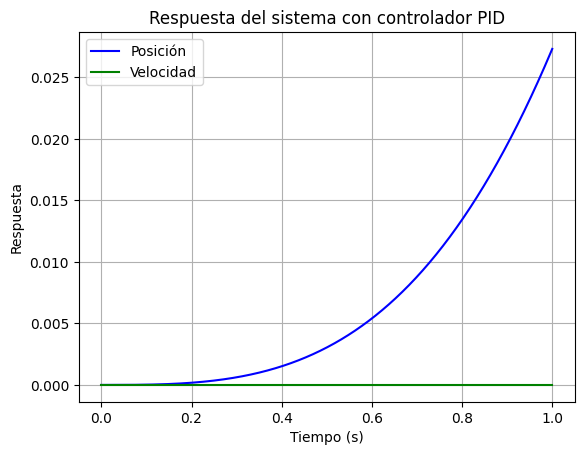

In [2]:

# Simular la respuesta del sistema a una entrada escalón
t, y = control.step_response(sys, T=np.linspace(0, 1, 1000))
sol = np.vstack((y, np.zeros_like(y))).T

# Graficar la respuesta del sistema
plt.plot(t, sol[:,0], 'b', label='Posición')
plt.plot(t, sol[:,1], 'g', label='Velocidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.title('Respuesta del sistema con controlador PID')
plt.legend()
plt.grid()
plt.show()

# Verificar que el sistema cumple con las especificaciones
error_estacionario = sol[-1, 0]
tiempo_subida = t[np.argmax(sol[:,0] > 0.9 * sol[-1,0])] - t[0]
